# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

4. ***Link Dataset***
   https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd         # Untuk manipulasi data
import numpy as np          # Untuk perhitungan numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns       # Untuk visualisasi yang lebih interaktif

# Library Preprocessing untuk Clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


# Library untuk Model Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
data_path = './Dataset_Inisiasi.csv'
df = pd.read_csv(data_path)

print(df.head())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan dimensi dataset (jumlah baris dan kolom)
print("\nDimensi Dataset:")
print("Jumlah Baris dan Kolom:", df.shape)


Dimensi Dataset:
Jumlah Baris dan Kolom: (8999910, 11)


In [5]:
# Menampilkan informasi tentang tipe data tiap kolom
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [6]:
# Analisis Variabel Nuemerik
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
print(f"\n Numerical Variables Analysis: {num_cols}")


 Numerical Variables Analysis: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']


In [7]:
# Statistik Deskriptif
print(df[num_cols].describe().T)

                 count        mean         std   min   25%    50%    75%  \
Unit_Price   8999910.0    5.818037   14.700501  0.32  1.05   1.75   3.21   
Quantity     8999910.0   23.138134   26.893207  1.00  6.00  11.00  30.00   
Discount     8999910.0    0.029729    0.044798  0.00  0.00   0.00   0.05   
Total_Price  8999910.0  130.743659  509.694743  0.30  8.40  21.14  69.49   

                  max  
Unit_Price     169.53  
Quantity       100.00  
Discount         0.15  
Total_Price  14295.30  


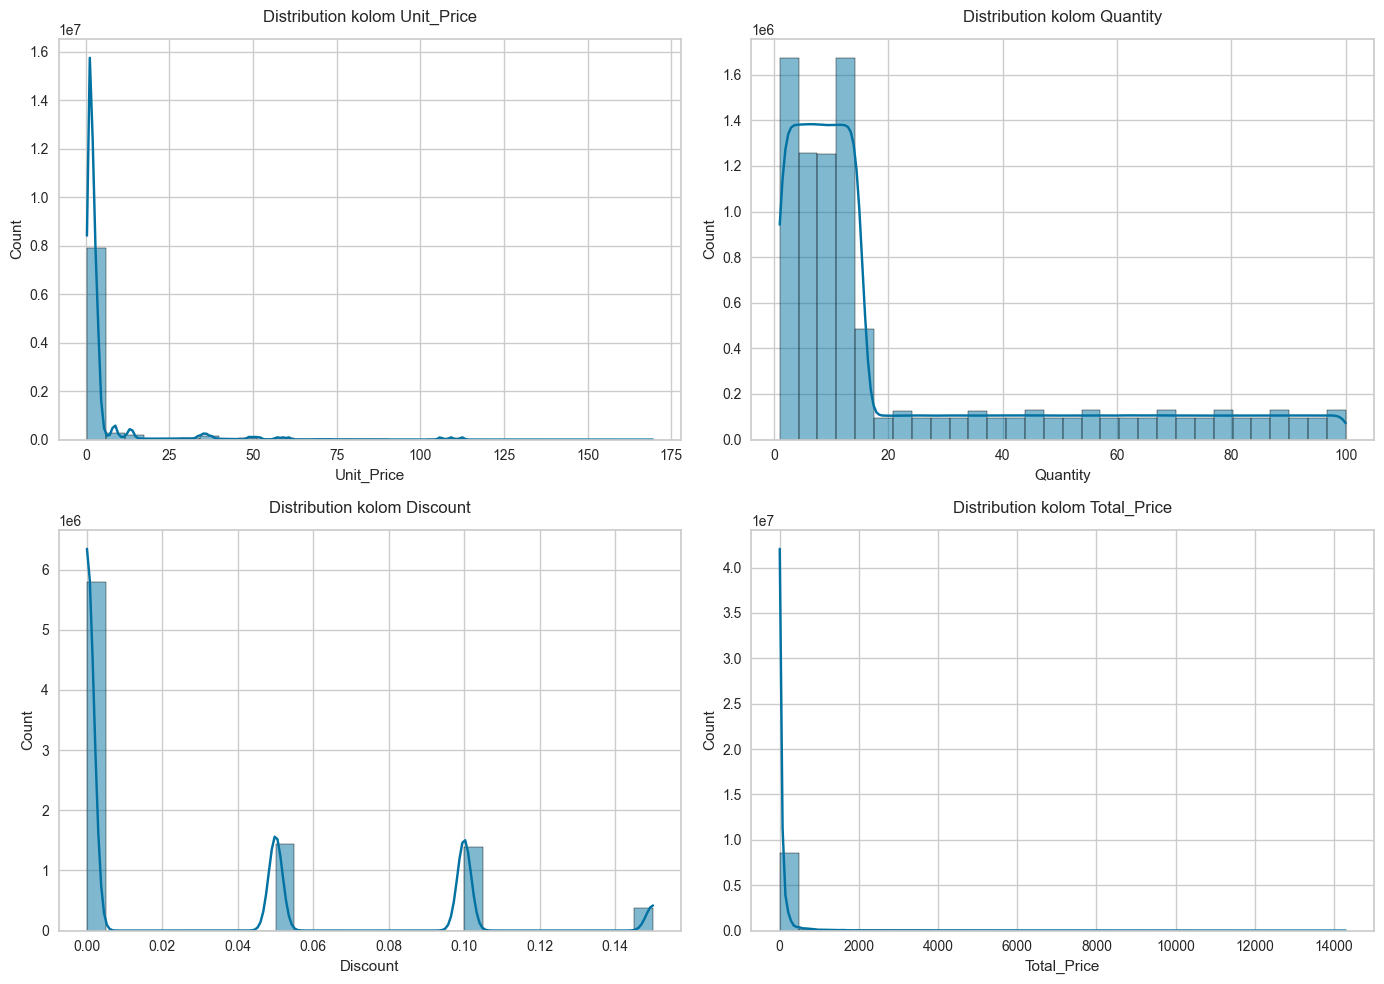

In [8]:
# Distribusi dengan Histogram & Boxplot
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution kolom {col}', pad=12)
    
plt.tight_layout()
plt.show()

In [9]:
# Analisis Variabel Kategorikal
cat_cols = ['Customer_Type', 'Region', 'Category']
print(f"Categorical Variables Analysis: {cat_cols}")

Categorical Variables Analysis: ['Customer_Type', 'Region', 'Category']


C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2101141531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='Set2')
C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2101141531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='Set2')
C:\Users\asus\AppData\Local\Temp\ipykernel_5192\2101141531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=order, palette='Set2')


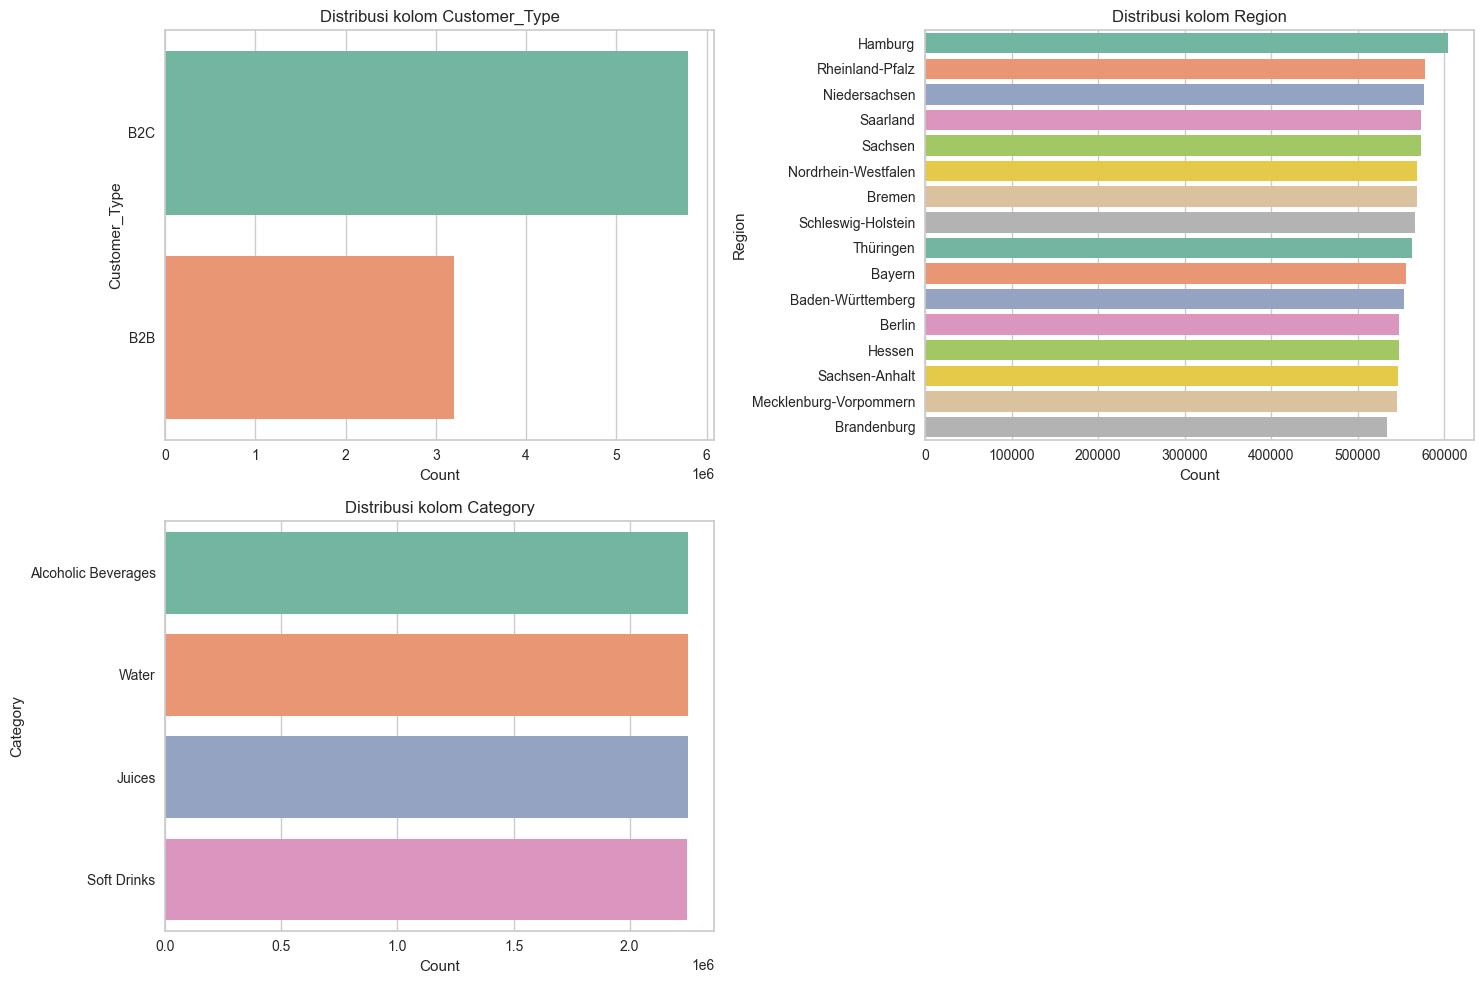

In [10]:
# Visualisasi Distribusi Kategorikal
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    order = df[col].value_counts().index
    sns.countplot(data=df, y=col, order=order, palette='Set2')
    plt.title(f'Distribusi kolom {col}')
    plt.xlabel('Count')
    
plt.tight_layout()
plt.show()

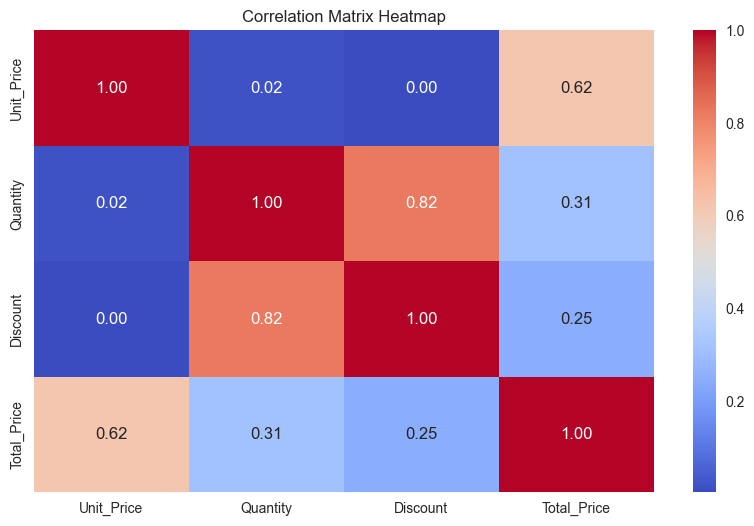

In [11]:
# Analisis Korelasi
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

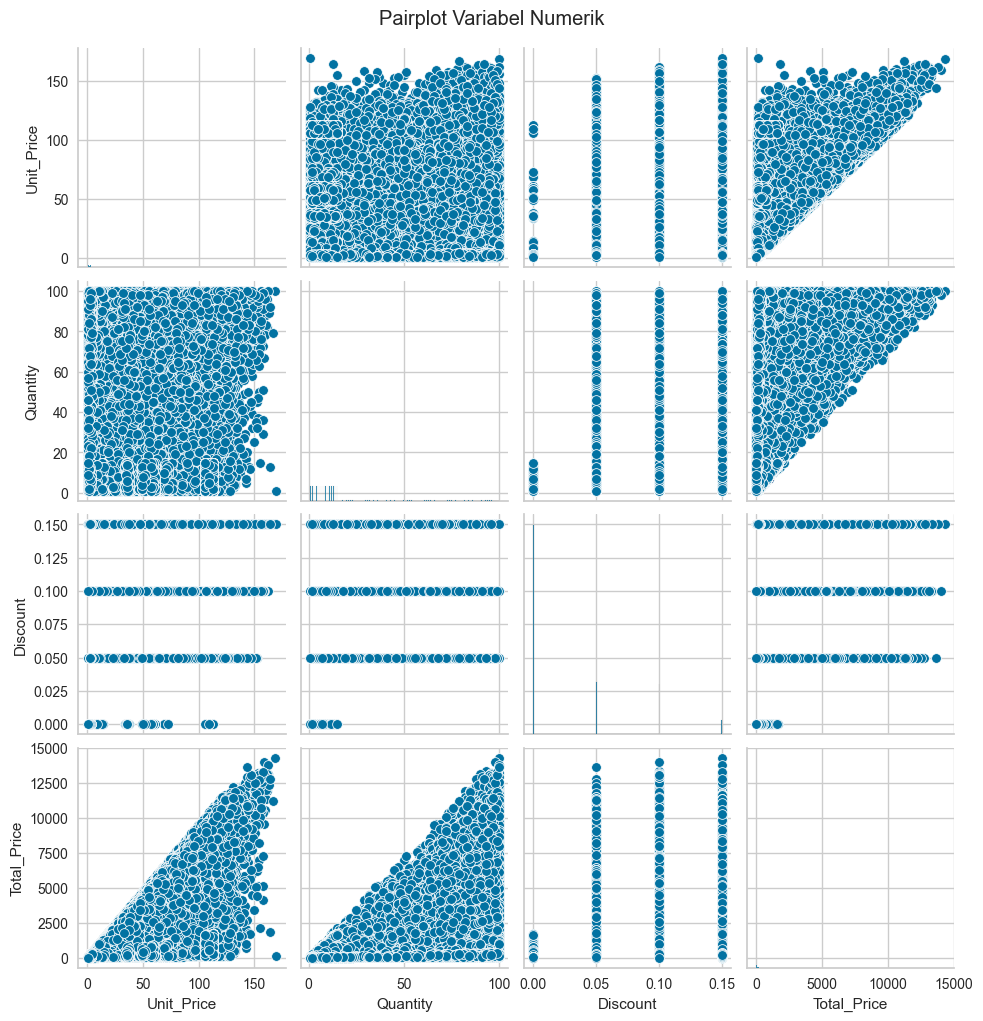

In [12]:
# Pairplot untuk melihat hubungan antar variabel numerik
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot Variabel Numerik", y=1.02)
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5192\1074051457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Region'].value_counts().values,


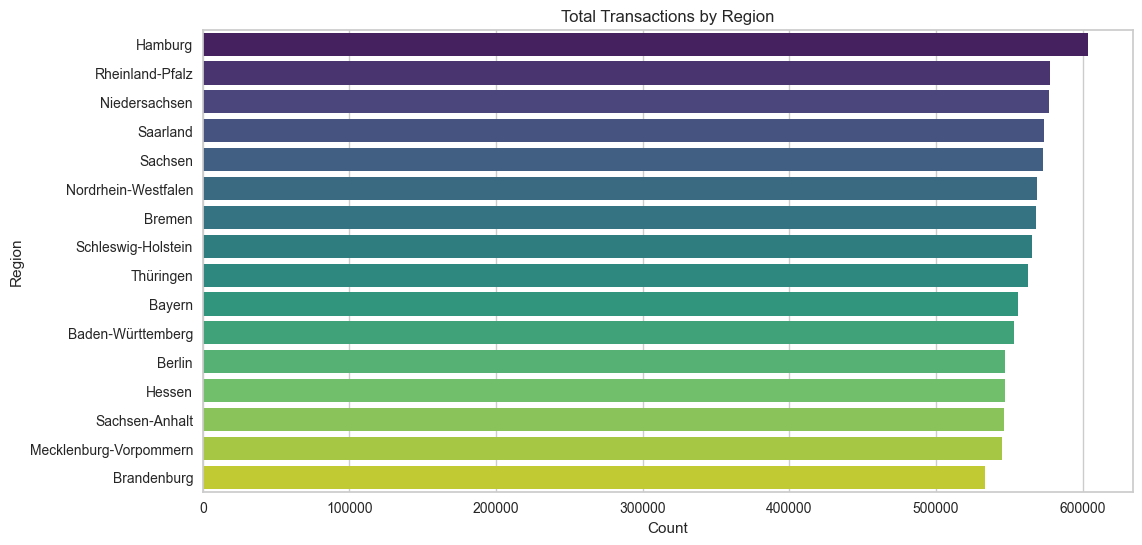

In [13]:
# Penjualan per Region
plt.figure(figsize=(12,6))
region_order = df['Region'].value_counts().index
sns.barplot(x=df['Region'].value_counts().values, 
            y=region_order, 
            palette='viridis')
plt.title('Total Transactions by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

In [14]:
# Konversi ke datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')  # 'coerce' untuk handle format invalid

# Cek apakah ada nilai invalid
print("Jumlah tanggal invalid:", df['Order_Date'].isna().sum())

Jumlah tanggal invalid: 0


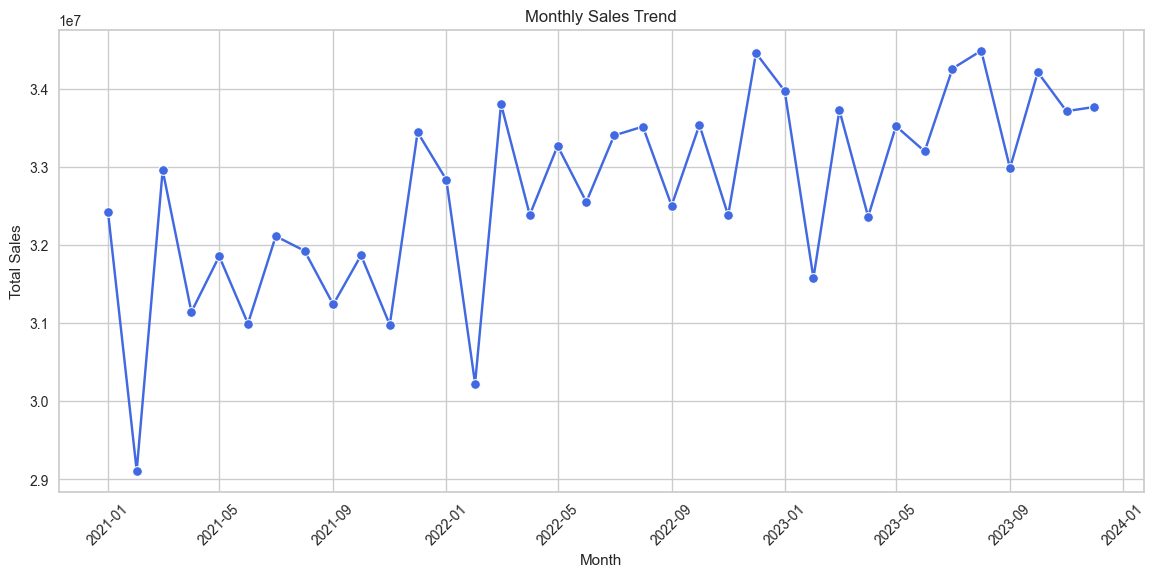

In [15]:
# Trend Bulanan (dengan parsing kolom Order_Date)
df['Order_Month'] = df['Order_Date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = df.groupby('Order_Month')['Total_Price'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(14,6))
sns.lineplot(
    data=monthly_sales, 
    x='Order_Month', 
    y='Total_Price', 
    marker='o', 
    color='royalblue'
)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
# Analisis B2B vs B2C
print("\nB2B vs B2C Analysis")


B2B vs B2C Analysis


C:\Users\asus\AppData\Local\Temp\ipykernel_5192\3760201438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Type', y='Total_Price',


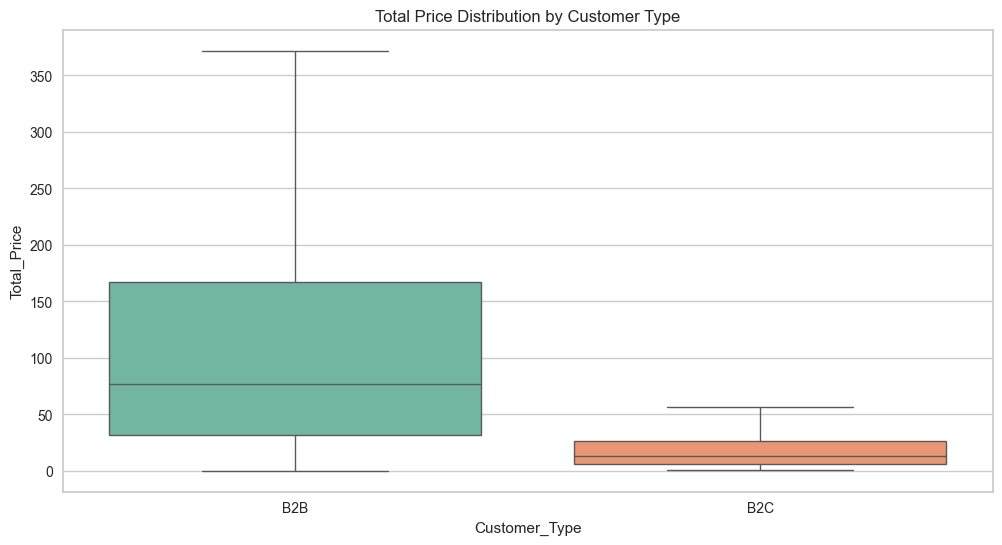

In [17]:
# Perbandingan Pembelian
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Customer_Type', y='Total_Price', 
            palette='Set2', showfliers=False)
plt.title('Total Price Distribution by Customer Type')
plt.show()

In [18]:
# Discount Analysis (Hanya B2B seharusnya ada discount)
discount_check = df.groupby('Customer_Type')['Discount'].mean()
print("\n💡 Average Discount by Customer Type:")
print(discount_check)


💡 Average Discount by Customer Type:
Customer_Type
B2B    0.083494
B2C    0.000000
Name: Discount, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_5192\1083417192.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='rocket')


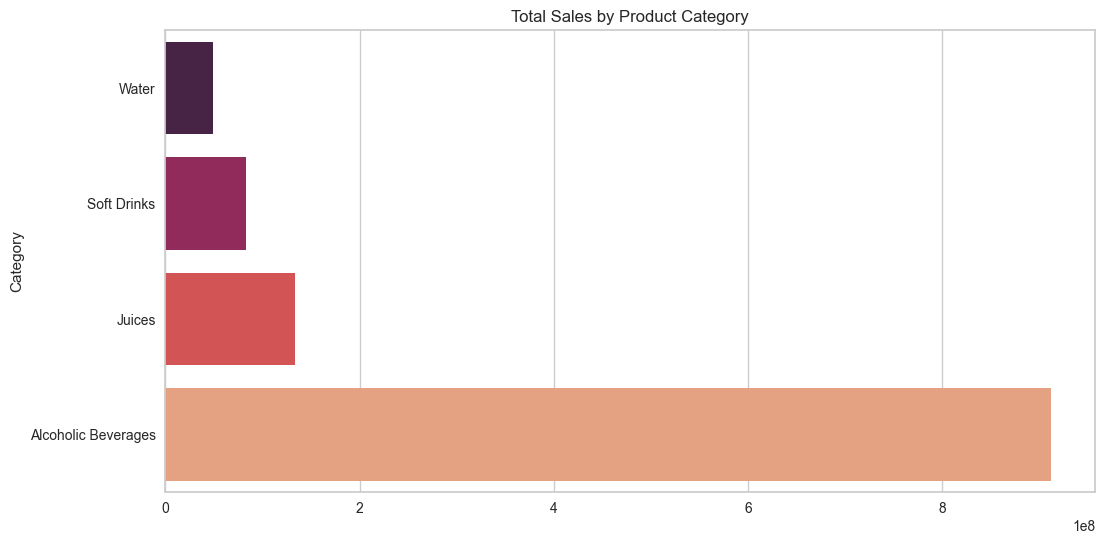

In [19]:
# Analisis Kategori Produk
plt.figure(figsize=(12,6))
category_sales = df.groupby('Category')['Total_Price'].sum().sort_values()
sns.barplot(x=category_sales.values, y=category_sales.index, palette='rocket')
plt.title('Total Sales by Product Category')
plt.show()

f:\Software\Anaconda\envs\main-ds\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


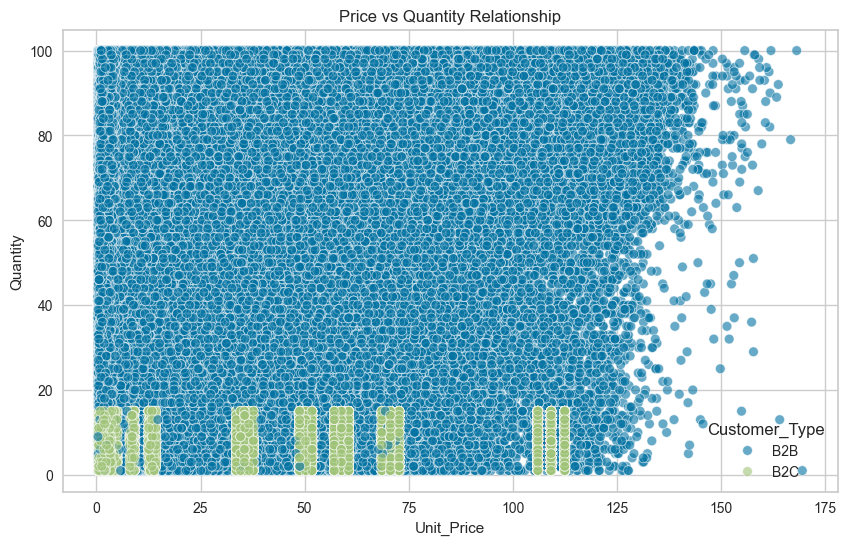

In [20]:
# Analisis Price vs Quantity
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Unit_Price', y='Quantity', 
                hue='Customer_Type', alpha=0.6)
plt.title('Price vs Quantity Relationship')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5192\858269499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Unit_Price', palette='Set3')


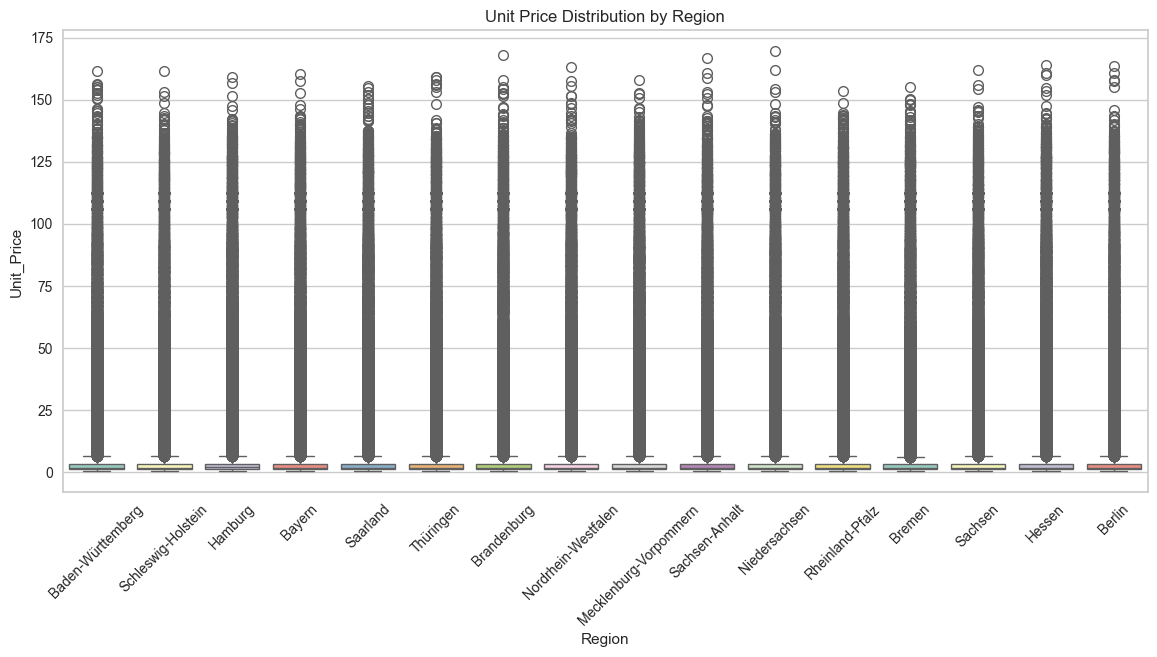

In [21]:
# Distribusi harga berdasarkan Region
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Region', y='Unit_Price', palette='Set3')
plt.title('Unit Price Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [22]:
# Handling Data Duplikat
print("Jumlah duplikat awal:", df.duplicated().sum())

Jumlah duplikat awal: 0


In [23]:
# Handling Missing Value
# Aturan bisnis: Discount hanya untuk B2B
df['Discount'] = np.where(
    df['Customer_Type'] == 'B2C',
    0.0,  # Force 0 untuk B2C
    df['Discount'].fillna(0.0)  # Isi NA B2B dengan 0
)

In [24]:
# Inisialisasi scaler
normalizer = MinMaxScaler() 
standardizer = StandardScaler()

In [25]:
# Normalisasi kolom kuantitas
df_norm = df.copy()
df_norm['Quantity'] = normalizer.fit_transform(df_norm[['Quantity']])
df_norm.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Order_Month
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,0.525253,0.10,79.18,Baden-Württemberg,2023-08-23,2023-08-01
1,ORD1,CUS1496,B2B,Evian,Water,1.56,0.898990,0.10,126.36,Baden-Württemberg,2023-08-23,2023-08-01
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,0.727273,0.05,81.14,Baden-Württemberg,2023-08-23,2023-08-01
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,0.585859,0.10,170.98,Baden-Württemberg,2023-08-23,2023-08-01
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,0.343434,0.10,27.40,Baden-Württemberg,2023-08-23,2023-08-01


In [26]:
# Standarisasi kolom harga
price_cols = ['Unit_Price', 'Total_Price']
df_std = df_norm.copy()
df_std[price_cols] = standardizer.fit_transform(df_std[price_cols])
df_std.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Order_Month
0,ORD1,CUS1496,B2B,Vio Wasser,Water,-0.282850,0.525253,0.10,-0.101166,Baden-Württemberg,2023-08-23,2023-08-01
1,ORD1,CUS1496,B2B,Evian,Water,-0.289653,0.898990,0.10,-0.008601,Baden-Württemberg,2023-08-23,2023-08-01
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,-0.316182,0.727273,0.05,-0.097320,Baden-Württemberg,2023-08-23,2023-08-01
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,-0.176731,0.585859,0.10,0.078942,Baden-Württemberg,2023-08-23,2023-08-01
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,-0.336590,0.343434,0.10,-0.202756,Baden-Württemberg,2023-08-23,2023-08-01


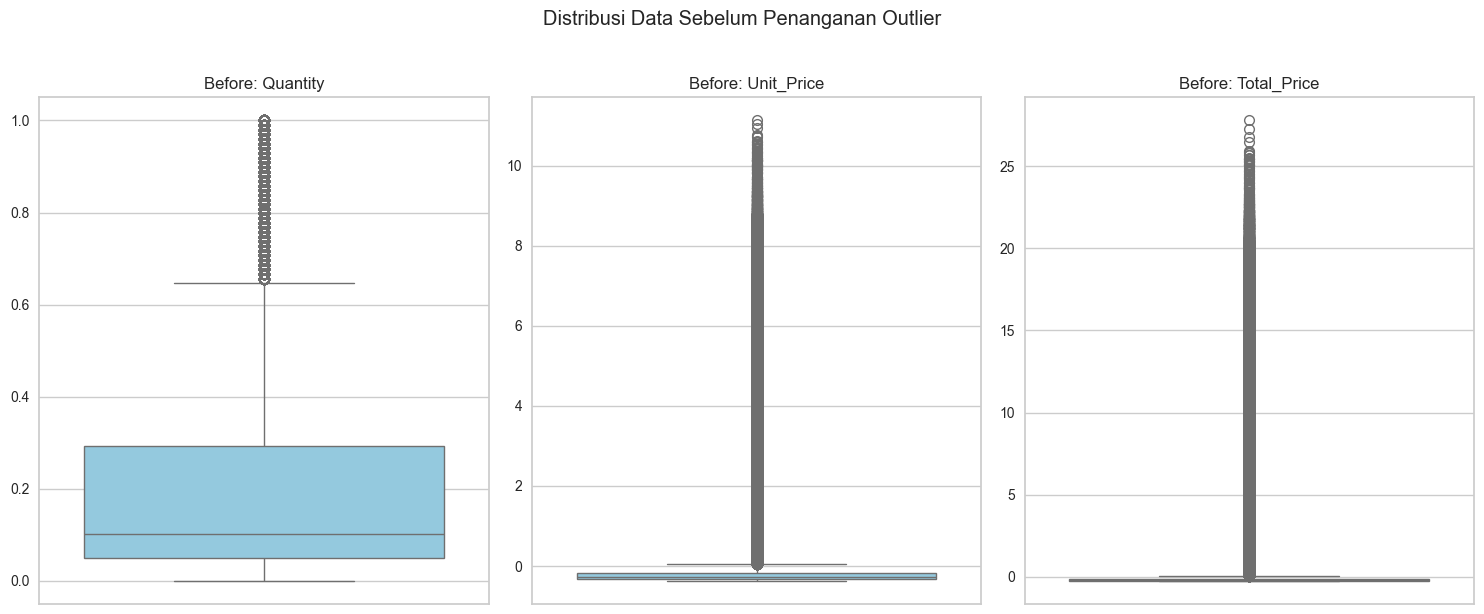

In [27]:
numerical_features = ['Quantity', 'Unit_Price', 'Total_Price']

plt.figure(figsize=(15, 6))
plt.suptitle("Distribusi Data Sebelum Penanganan Outlier", y=1.02)

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_std[col], color='skyblue')
    plt.title(f'Before: {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [28]:
# PENANGANAN OUTLIER (IQR WINSORIZING)
def winsorize_data(df, columns):
    df_out = df.copy()
    for col in columns:
        q1 = df_out[col].quantile(0.25)
        q3 = df_out[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        df_out[col] = np.clip(df_out[col], lower, upper)
    return df_out

df_clean = winsorize_data(df_std, numerical_features)

In [29]:
print("🔼 Jumlah Data Sebelum vs Sesudah:")
print(f"Sebelum: {len(df_std)} baris")
print(f"Sesudah: {len(df_clean)} baris (Winsorizing tidak menghapus data)")

print("\n📊 Statistik Sebelum:")
display(df_std[numerical_features].describe().round(2))

print("\n📊 Statistik Sesudah:")
display(df_clean[numerical_features].describe().round(2))

🔼 Jumlah Data Sebelum vs Sesudah:
Sebelum: 8999910 baris
Sesudah: 8999910 baris (Winsorizing tidak menghapus data)

📊 Statistik Sebelum:


,Quantity,Unit_Price,Total_Price
count,8999910.00,8999910.00,8999910.00
mean,0.22,-0.00,-0.00
std,0.27,1.00,1.00
min,0.00,-0.37,-0.26
25%,0.05,-0.32,-0.24
50%,0.10,-0.28,-0.22
75%,0.29,-0.18,-0.12
max,1.00,11.14,27.79



📊 Statistik Sesudah:


,Quantity,Unit_Price,Total_Price
count,8999910.00,8999910.00,8999910.00
mean,0.20,-0.23,-0.16
std,0.22,0.12,0.11
min,0.00,-0.37,-0.26
25%,0.05,-0.32,-0.24
50%,0.10,-0.28,-0.22
75%,0.29,-0.18,-0.12
max,0.66,0.04,0.06


In [30]:
# Encoding hierarkis
encoder = LabelEncoder()
df_encoded = df_clean.copy()

In [31]:
# Label encoding untuk kategori produk dan region
categorical_cols = ['Category', 'Region', 'Product']
df_encoded[categorical_cols] = df_encoded[categorical_cols].apply(
    lambda x: encoder.fit_transform(x)
)

In [32]:
# One-hot encoding untuk tipe pelanggan
ohe = OneHotEncoder(sparse_output=False)
customer_type_encoded = ohe.fit_transform(df_encoded[['Customer_Type']])
df_encoded[ohe.get_feature_names_out()] = customer_type_encoded

In [33]:
# Cek Data yang sudah melalui tahap Preprocessing
df_encoded.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Order_Month,Customer_Type_B2B,Customer_Type_B2C
0,ORD1,CUS1496,B2B,42,3,-0.282850,0.525253,0.10,-0.101166,0,2023-08-23,2023-08-01,1.0,0.0
1,ORD1,CUS1496,B2B,9,3,-0.289653,0.656566,0.10,-0.008601,0,2023-08-23,2023-08-01,1.0,0.0
2,ORD1,CUS1496,B2B,38,2,-0.316182,0.656566,0.05,-0.097320,0,2023-08-23,2023-08-01,1.0,0.0
3,ORD1,CUS1496,B2B,29,1,-0.176731,0.585859,0.10,0.059607,0,2023-08-23,2023-08-01,1.0,0.0
4,ORD1,CUS1496,B2B,12,3,-0.336590,0.343434,0.10,-0.202756,0,2023-08-23,2023-08-01,1.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.